This is the second Notebook used in this assignment that exclusively focusses on EDA and feature selection for model trainnig based incorporating temporal, sentimental features in addition to existing product and review data available in the fetched Dataset.




Question 2 :  Use data pre-processing? EDA? Feature engineering.
a. In each category, what techniques did you use?
b. Discuss briefly what did you use
c. Please be sure for data pre-processing, address all possible approaches.
d. What feature engineering did you use? Use 1 filtering, 1 embedding and 1 wrapping.
i. What do you learn from this?
ii. Can you analyze multi-collinearity results?
iii. How many features you started your training process? Removing any
features?


Answerrs for all the EDA steops are commented as code and text blocks under code and there is a summary at the end of the notebook.

In [ ]:
# importing paths and relevant libraries for project
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')


from google.colab import drive
import os

drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/CS6140_MidTerm')

print("Working Directory : ", os.getcwd())

# Setting up Directories to download and store relevant files in respectiev directories
PROJECT_DIR = Path('/content/drive/MyDrive/CS6140_MidTerm')
RAW_DATA_DIR = PROJECT_DIR / 'Data' / 'Raw'
PROCESSED_DATA_DIR = PROJECT_DIR / 'Data' / 'Processed'

# Creating Directories if they do not exist
RAW_DATA_DIR.mkdir(parents=True, exist_ok=True)
PROCESSED_DATA_DIR.mkdir(parents=True, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Working Directory :  /content/drive/MyDrive/CS6140_MidTerm


In [ ]:
os.chdir(PROCESSED_DATA_DIR)

product_df = pd.read_csv('merged_product_data.csv')

In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113368 entries, 0 to 113367
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   asin                      113368 non-null  object 
 1   is_successful             113368 non-null  int64  
 2   Label                     113368 non-null  object 
 3   week1_reviews             113368 non-null  float64
 4   week2_4_reviews           113368 non-null  float64
 5   month2_reviews            113368 non-null  float64
 6   month3_reviews            113368 non-null  float64
 7   reviews_per_week          113368 non-null  float64
 8   avg_days_between_reviews  113368 non-null  float64
 9   total_reviews_90d         113368 non-null  float64
 10  momentum_shift            113368 non-null  float64
 11  early_momenmtum_pct       113368 non-null  float64
 12  avg_rating                113368 non-null  float64
 13  std_rating                113368 non-null  f

In [ ]:
df = product_df.copy()
print("==============================DATASET OVERVIEW: ==============================")
print(f"Number of space objects observed in this dataset : {df.shape[0]}")
print(f"Number of features included in the dataset       : {df.shape[1]}")


#Creating a comprehensive feature analysis
feature_analysis = []

for i, column in enumerate(df.columns, start = 1):
  # Saving the dtype
  dtype = df[column].dtype

  # Saving unique value counts
  unique_value_counts = df[column].nunique(dropna = False)

  # Check for number of missing values
  missing_value_count = df[column].isna().sum()

  # Missing count percentage
  missing_value_percentage = round((missing_value_count / df.shape[0]) * 100, 2)

  # Determine the variable type
  if dtype in ['int32', 'int64']:
    feature_type = "Discrete"

  elif dtype in ['float32', 'float64']:
    feature_type = "Continuous"

  elif dtype in ['object', 'bool', 'category']:
    feature_type = "Categorical"

  else:
    feature_type = "Mixed/Other"


  # Appending the values to feature analysis list
  feature_analysis.append({
                           "Feature_Index" : i,
                           "Feature_Name" : column,
                           "Feature_Data_Type" : dtype,
                           "Unique_Value_Count" : unique_value_counts,
                           "Missing_Value_Count" : missing_value_count,
                           "Missing_Percentage" : missing_value_percentage,
                           "Feature_Type" : feature_type
                           })

print()

# Displaying the results in a better readable manner
feature_df = pd.DataFrame(feature_analysis)

print(feature_df.to_string(index=False))

==============================DATASET OVERVIEW: ==============================
Number of space objects observed in this dataset : 113368
Number of features included in the dataset       : 73

 Feature_Index             Feature_Name Feature_Data_Type  Unique_Value_Count  Missing_Value_Count  Missing_Percentage Feature_Type
             1                     asin            object              113368                    0                 0.0  Categorical
             2            is_successful             int64                   2                    0                 0.0     Discrete
             3                    Label            object                   3                    0                 0.0  Categorical
             4            week1_reviews           float64                  22                    0                 0.0   Continuous
             5          week2_4_reviews           float64                  45                    0                 0.0   Continuous
             6  

Question 1d : Analyze your data, any categorical, ordinal, and etc?

In [ ]:
# The Dataset that has been generated from original product reviews and meta data form a 72 feature dataset , where is_successful is the target variable
# ansd Label complements the target variable
# There are aboput 30 categorical features which are boolean, one hot encoded.
# They are either of Store category or Beauty segment category

# Discrete Features in the dataset include all features that cater to review counts such as :  verified_purchase_count and total_reviews

# Continuous features the rest features are continuous
# Though features like count_1_star and other similar features are dicreete counts given that the data tyope is float 64 they have been considered
# as continuous features as well.

# There are ordinal features that are embedded in the data, such as sentiment categories and aggragated rting counts whhere higher the value a
# product obtains higher will it be ranked among other products in the dataset.


# There are no data quality isses checks for missing values and imputation were perfomed in the Data Preparation Notebook (Notebok 1).

Class Distribution:
  Successful: 6704 (5.91%)
  Unsuccessful: 106664 (94.09%)
  Class Ratio : 1 : 15.91


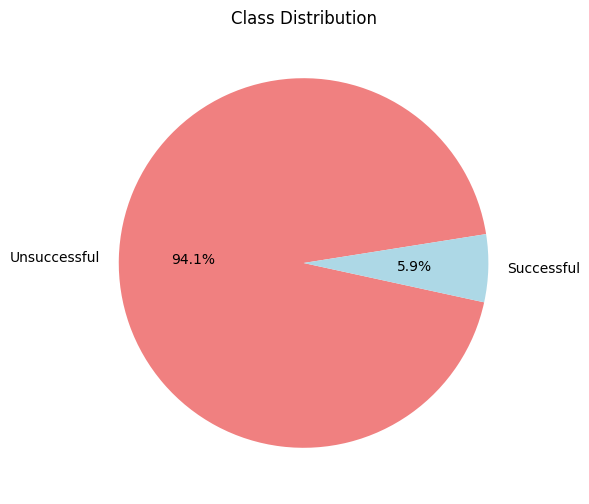


Saved: class_distribution.png


<Figure size 640x480 with 0 Axes>

In [ ]:
class_dist = product_df['is_successful'].value_counts()
class_dist_pct = product_df['is_successful'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"  Successful: {class_dist[1]} ({class_dist_pct[1]:.2f}%)")
print(f"  Unsuccessful: {class_dist[0]} ({class_dist_pct[0]:.2f}%)")
print(f"  Class Ratio : 1 : {class_dist[0] / class_dist[1]:.2f}")

# Creating a pie chart with classs distributions
plt.figure(figsize=(6, 6))
plt.pie(class_dist, labels=['Unsuccessful', 'Successful'], autopct='%1.1f%%', startangle=9, colors=['lightcoral', 'lightblue'])
plt.title('Class Distribution')
plt.show()

os.chdir(PROJECT_DIR/'Outputs'/'Figures')
plt.savefig('class_distribution_pc.png', dpi=300, bbox_inches='tight')
print("\nSaved: class_distribution.png")

The dataset exhibits significant class imbalance (1:15.91 ratio), reflecting the real-world phenomenon where most beauty products do not achieve strong market success.

In [ ]:
# Feature Group Analysis

# Identifying feature groups
temporal_features = [
    col for col in product_df.columns
    if any(keyword in col.lower() for keyword in [
        'week', 'month', 'reviews_per', 'momentum', 'growth',
        'total_reviews', 'days_between', 'early_'
    ])
]

rating_features = [
    col for col in product_df.columns
    if any(keyword in col.lower() for keyword in [
        'rating', 'star'
    ])
]

text_features = [
    col for col in product_df.columns
    if any(keyword in col.lower() for keyword in [
        'review_length', 'word_count', 'sentiment',
        'pct_detailed', 'pct_positive', 'pct_negative'
    ])
]

verified_features = [
    col for col in product_df.columns
    if 'verified' in col.lower()
]

categorical_features = [
    col for col in product_df.columns
    if col.startswith('category_') or col.startswith('store_')
]

engineered_features = [
    col for col in product_df.columns
    if any(keyword in col.lower() for keyword in [
        'lg_', 'log_', '_vs_', 'is_'  # log transforms, ratios, interactions
    ])
]



print(f"\nTemporal/Velocity Features ({len(temporal_features)}):")
for f in temporal_features:
    print(f"   • {f}")

print(f"\nRating Features ({len(rating_features)}):")
for f in rating_features:
    print(f"   • {f}")

print(f"\nText/Sentiment Features ({len(text_features)}):")
for f in text_features:
    print(f"   • {f}")

print(f"\nVerified Purchase Features ({len(verified_features)}):")
for f in verified_features:
    print(f"   • {f}")

print(f"\nEngineered Features ({len(engineered_features)}):")
for f in engineered_features:
    print(f"   • {f}")

print(f"\nCategorical Features ({len(categorical_features)}):")
print(f"   • {len([c for c in categorical_features if c.startswith('category_')])} category columns")
print(f"   • {len([c for c in categorical_features if c.startswith('store_')])} store columns")


Temporal/Velocity Features (12):
   • week1_reviews
   • week2_4_reviews
   • month2_reviews
   • month3_reviews
   • reviews_per_week
   • avg_days_between_reviews
   • total_reviews_90d
   • momentum_shift
   • early_momentum_pct
   • total_reviews
   • rating_early_vs_lifetime
   • review_growth_rate

Rating Features (17):
   • avg_rating
   • std_rating
   • min_rating
   • max_rating
   • median_rating
   • count_1_star
   • count_2_star
   • count_3_star
   • count_4_star
   • count_5_star
   • pct_1_star
   • pct_2_star
   • pct_3_star
   • pct_4_star
   • pct_5_star
   • lifetime_avg_rating
   • rating_early_vs_lifetime

Text/Sentiment Features (11):
   • avg_review_length
   • std_review_length
   • avg_word_count
   • pct_detailed_reviews
   • mean_sentiment
   • std_sentiment
   • min_sentiment
   • max_sentiment
   • sentiment_range
   • pct_positive
   • pct_negative

Verified Purchase Features (3):
   • verified_purchase_count
   • verified_purchase_mean
   • pct_verifie

In [ ]:
# Check for missing a values

missing = product_df.isnull().sum()
if missing.sum() == 0:
  print("The dataset has no missing values")
else:
  print("The dataset has missing values")

The dataset has no missing values


In [ ]:
# Check for duplicates in the dataset
duplicates = product_df.duplicated()
if duplicates.sum() == 0:
  print("The dataset has no duplicates")
else:
  print("The dataset has duplicates")

The dataset has no duplicates


In [ ]:
OUTPUT_DIR = PROJECT_DIR / 'Outputs'


TEMPORAL/VELOCITY FEATURES (7 features)

 Saved: temporal_distributions.png


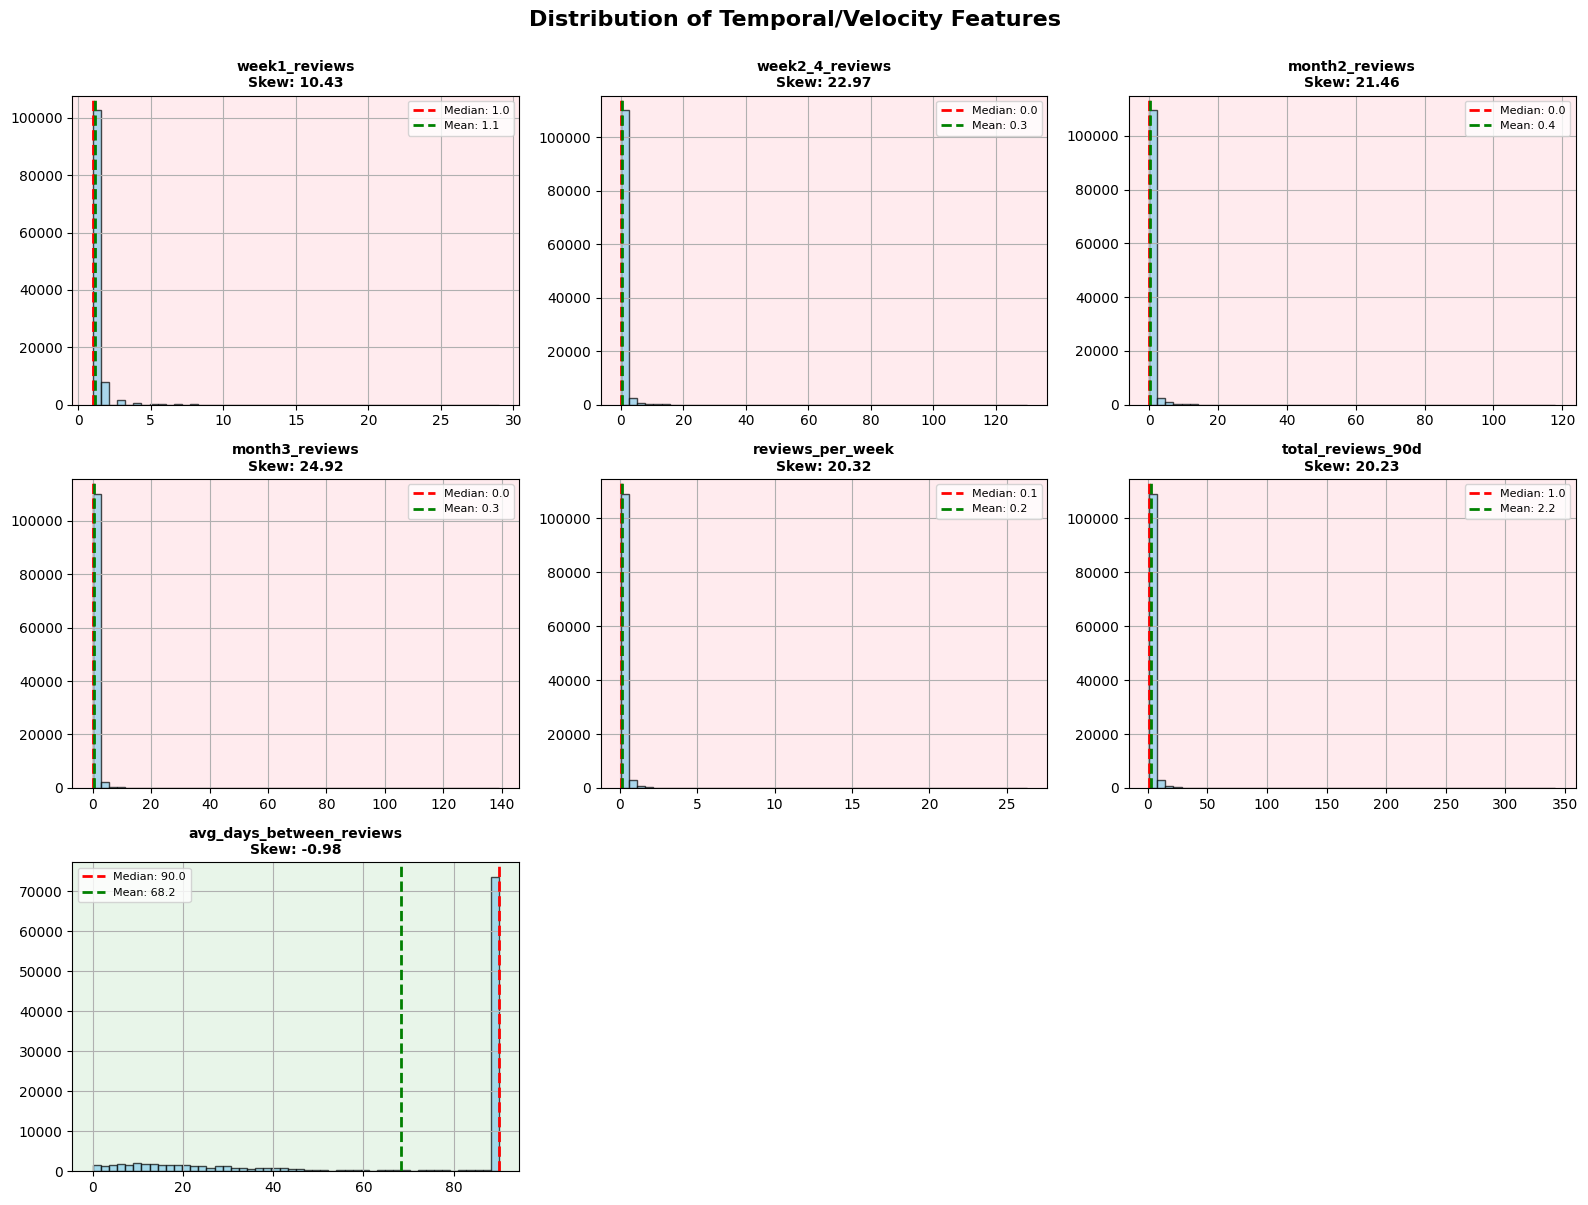

In [ ]:
# Temporal/velocity features
temporal_features = [
    'week1_reviews', 'week2_4_reviews', 'month2_reviews', 'month3_reviews',
    'reviews_per_week', 'total_reviews_90d', 'avg_days_between_reviews'
]

# Filter to existing
temporal_features = [f for f in temporal_features if f in product_df.columns]

print(f"\nTEMPORAL/VELOCITY FEATURES ({len(temporal_features)} features)") # exclusing generated features using other set of features

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(temporal_features):
    if idx >= 9:
        break

    ax = axes[idx]

    # Histogram
    product_df[feature].hist(bins=50, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)

    # Calculate stats
    skewness = skew(product_df[feature])
    median = product_df[feature].median()
    mean = product_df[feature].mean()

    # Add vertical lines
    ax.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:.1f}')
    ax.axvline(mean, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean:.1f}')

    # Title with skewness
    ax.set_title(f'{feature}\nSkew: {skewness:.2f}', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.legend(fontsize=8)

    # Color code title based on skewness
    if abs(skewness) < 1:
        ax.set_facecolor('#e8f5e9')  # Light green
    elif abs(skewness) < 2:
        ax.set_facecolor('#fff9c4')  # Light yellow
    else:
        ax.set_facecolor('#ffebee')  # Light red

# Remove empty subplots
for idx in range(len(temporal_features), 9):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution of Temporal/Velocity Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
os.chdir(OUTPUT_DIR/'Figures')
plt.savefig('temporal_distributions.png', dpi=300, bbox_inches='tight')
print("\n Saved: temporal_distributions.png")
plt.show()

Inference

*   Most products fail to maintain review velocity after launch week. First week is make or break for product success trajectory, where week1_revies > median (1) reviews.
*   Most products recieve less than 1 review per week and few products receieve 5-10 reviews per week showing a longer tail.
*   Review feeqency drops sharlply for unsuccessful products.
* Successful products have sustained momemtum for month 2 and month 3








Saved: rating_distributions.png


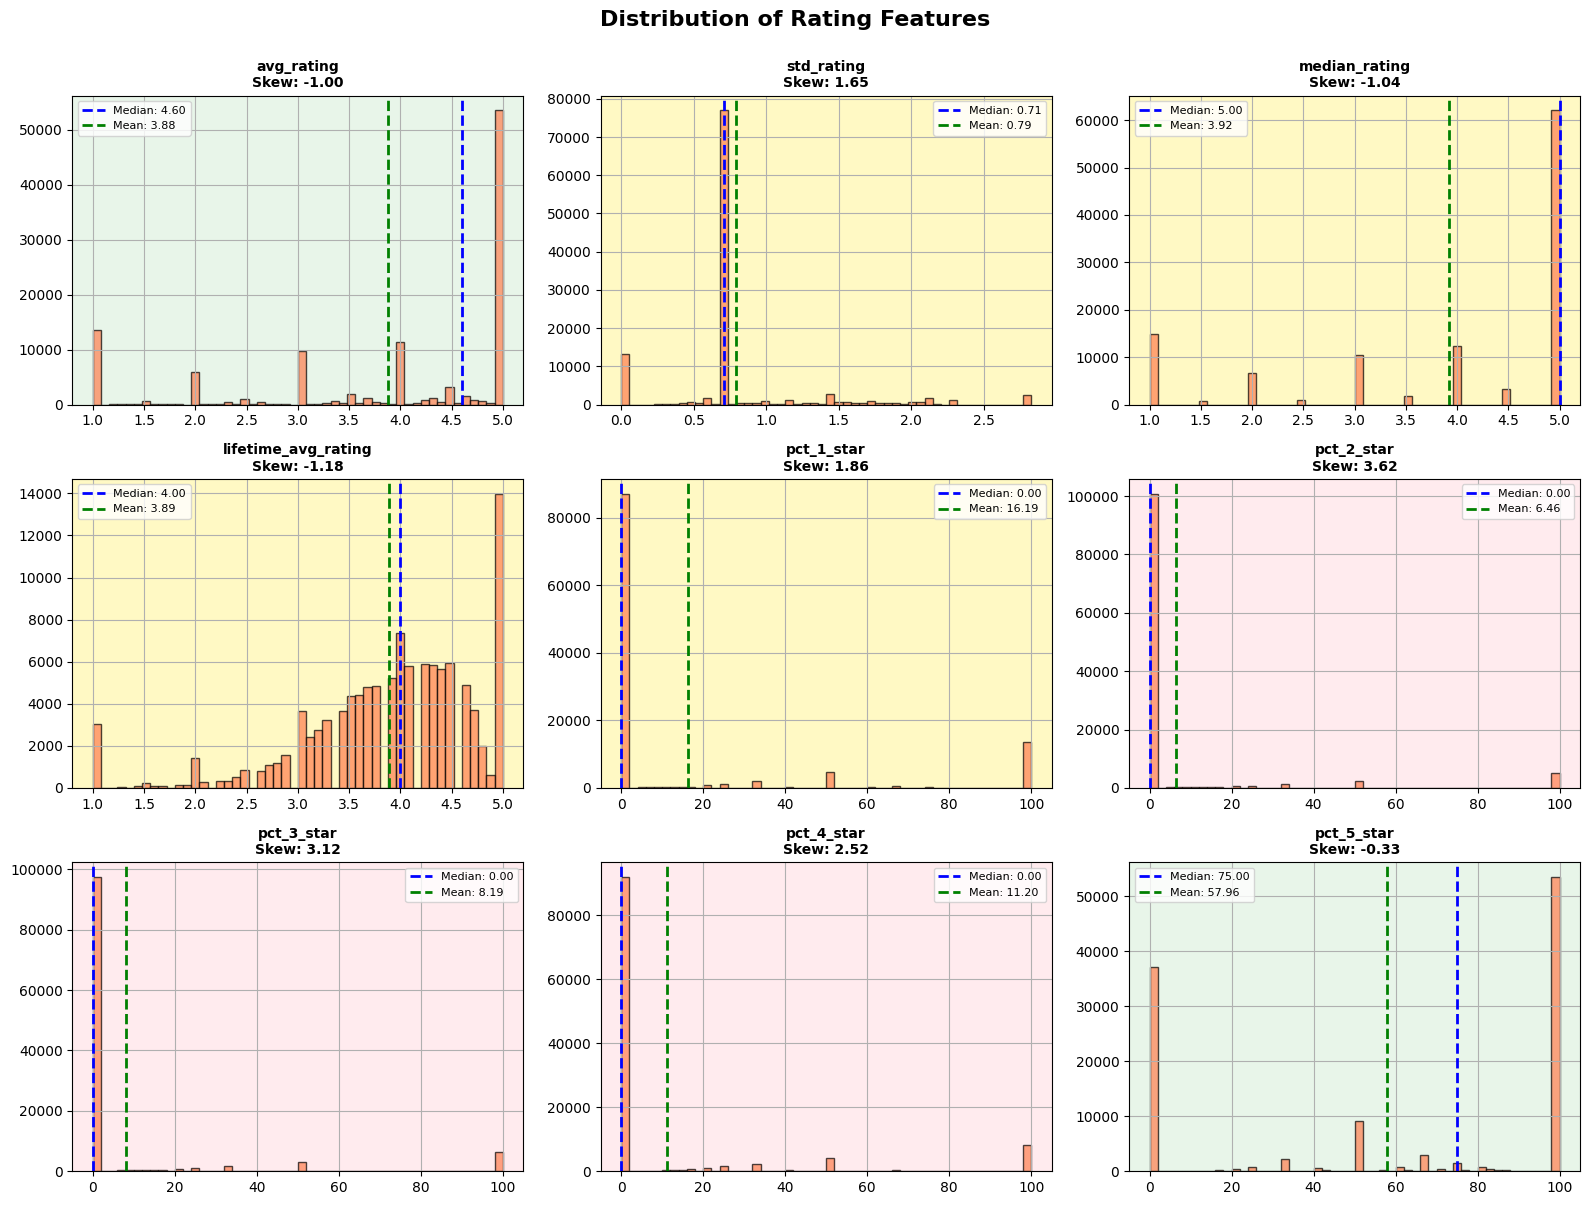

In [ ]:
# Rating Features

rating_features = [
    'avg_rating', 'std_rating', 'median_rating', 'lifetime_avg_rating',
    'pct_1_star', 'pct_2_star', 'pct_3_star', 'pct_4_star', 'pct_5_star'
]


fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(rating_features):
    if idx >= 9:
        break

    ax = axes[idx]

    # Histogram
    product_df[feature].hist(bins=50, ax=ax, color='coral', edgecolor='black', alpha=0.7)

    # Stats
    skewness = skew(product_df[feature])
    median = product_df[feature].median()
    mean = product_df[feature].mean()

    # Lines
    ax.axvline(median, color='blue', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    ax.axvline(mean, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')

    # Title
    ax.set_title(f'{feature}\nSkew: {skewness:.2f}', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.legend(fontsize=8)

    # Color code
    if abs(skewness) < 1:
        ax.set_facecolor('#e8f5e9')
    elif abs(skewness) < 2:
        ax.set_facecolor('#fff9c4')
    else:
        ax.set_facecolor('#ffebee')

# Remove empty
for idx in range(len(rating_features), 9):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution of Rating Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
os.chdir(OUTPUT_DIR/'Figures')
plt.savefig('rating_distributions.png', dpi=300, bbox_inches='tight')
print("\nSaved: rating_distributions.png")

Inferences

*   High rating Concentration in 3.5 - 5.0 stars, hihghlighting higher rating is not the only metric that defines success.
*   Extereme rating percentages succesful products likely have hihghr pct_5_star , a low pct_1_star will help differentiate products rather than 5 given the high number of 5 star ratings in the dataset.
* Lower the std of rating , more collective accepted qualityt of product rather than products with high std deviation which could potentially indicate controversilal product


Saved: sentiment_text_distributions.png


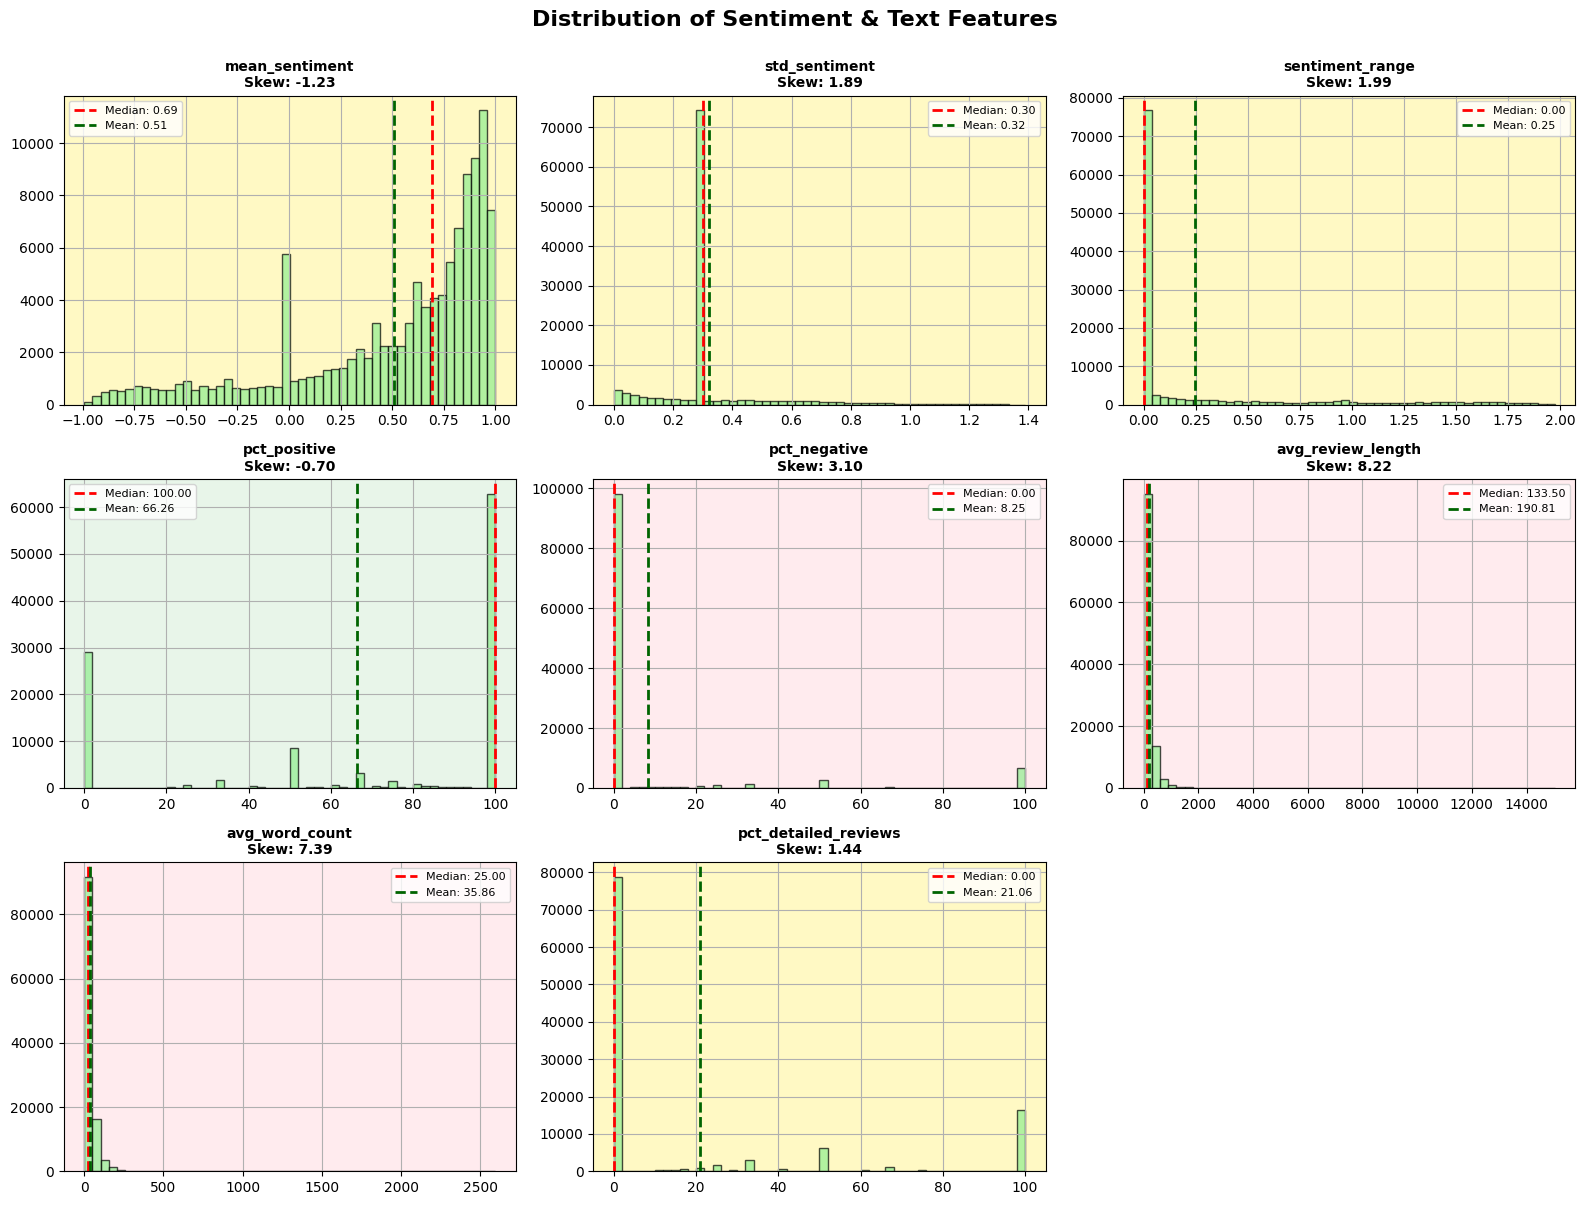

In [ ]:
# Sentiment Feature  Plots

sentiment_text_features = [
    'mean_sentiment', 'std_sentiment', 'sentiment_range',
    'pct_positive', 'pct_negative',
    'avg_review_length', 'avg_word_count', 'pct_detailed_reviews'
]

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, feature in enumerate(sentiment_text_features):
    if idx >= 9:
        break

    ax = axes[idx]

    # Histogram
    product_df[feature].hist(bins=50, ax=ax, color='lightgreen', edgecolor='black', alpha=0.7)

    # Stats
    skewness = skew(product_df[feature])
    median = product_df[feature].median()
    mean = product_df[feature].mean()

    # Lines
    ax.axvline(median, color='red', linestyle='--', linewidth=2, label=f'Median: {median:.2f}')
    ax.axvline(mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')

    # Title
    ax.set_title(f'{feature}\nSkew: {skewness:.2f}', fontsize=10, fontweight='bold')
    ax.set_xlabel('')
    ax.legend(fontsize=8)

    # Color code
    if abs(skewness) < 1:
        ax.set_facecolor('#e8f5e9')
    elif abs(skewness) < 2:
        ax.set_facecolor('#fff9c4')
    else:
        ax.set_facecolor('#ffebee')

# Remove empty
for idx in range(len(sentiment_text_features), 9):
    fig.delaxes(axes[idx])

plt.suptitle('Distribution of Sentiment & Text Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
os.chdir(OUTPUT_DIR/'Figures')
plt.savefig('sentiment_text_distributions.png', dpi=300, bbox_inches='tight')
print("\nSaved: sentiment_text_distributions.png")
plt.show()

Inferences

*   Positive sentiment bias with positive skew, pct positive has 1005 Median and 66% mean highlighting mosytly positive reviews. and similarly pct_negative with median 0% and mean 8.25% highlights very few negative reviews.
*   Short reviews dominate , avg-review-length is median 133.5 and mean 191 lower than detail review threshold set at 250.
*   Most products have consistent sentiment across reviews, with lower variance suggests users agree on the product quality and use.


In [ ]:
product_df['is_successful'].value_counts()

,count
is_successful,
0,106664
1,6704


In [ ]:
numeric_columns = product_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"There are about {len(numeric_columns)} numeric columns in the dataset to check for outliers")

There are about 44 numeric columns in the dataset to check for outliers


In [ ]:
# Using Box - Whisker Plots to identify the outliers within IQR

outlier_data = []

for column in numeric_columns:
  if column == "is_successful" :
    continue

  # Including dropna() as a good measure
  data = product_df[column].dropna()

  q1 = data.quantile(0.25)
  q2 = data.quantile(0.50) # Median
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)

  outliers = data[(data < (q1 - 1.5 * iqr))| (data > (q3 + 1.5 * iqr))].to_list()


  outlier_data.append({
                       "FEATURE_NAME" : column,
                       "MIN" : min(data),
                       "LOWER BOUND" : lower_bound,
                       "Q1" : q1,
                       "MEAN" : data.mean(),
                       "MEDIAN" : q2,
                       "Q3" : q3,
                       "IQR" : iqr,
                       "STD" : data.std(),
                       "UPPER BOUND" : upper_bound,
                       "MAX" : max(data),
                       "OUTLIERS_COUNT" : len(outliers),
                       "OUTLIERS" : outliers
                       })

  plt.figure(figsize=(6,6))
  plt.boxplot(data, vert = False, whis = 1.5, showfliers = True)
  plt.xlabel(column)
  plt.title(f"Box Plot for {column}")
  plt.show()


  print("======== DATA METRICS =========")
  print(f"MEAN: {data.mean()}")
  print(f"MEDIAN: {q2}")
  print(f"STANDARD DEVIATION: {data.std()}")
  print(f"Q1 = {q1} , Q3 = {q3}, IQR = {iqr}")
  print(f"MIN : {min(data)}, MAX : {max(data)}")
  print(f"LOWER BOUND : {lower_bound}, UPPER BOUND : {upper_bound}")
  print(f"OUTLIERS: \n{outliers} \n NUMBER OF OUTLIERS : {len(outliers)}")
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
outlier_df = pd.DataFrame(outlier_data)
print(outlier_df)

                FEATURE_NAME        MIN  LOWER BOUND          Q1        MEAN      MEDIAN          Q3         IQR         STD  UPPER BOUND           MAX  OUTLIERS_COUNT                                           OUTLIERS
0              week1_reviews   1.000000     1.000000    1.000000    1.146011    1.000000    1.000000    0.000000    0.630537     1.000000     29.000000           10712  [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...
1            week2_4_reviews   0.000000     0.000000    0.000000    0.327932    0.000000    0.000000    0.000000    1.347535     0.000000    130.000000           18900  [1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
2             month2_reviews   0.000000     0.000000    0.000000    0.367405    0.000000    0.000000    0.000000    1.577305     0.000000    118.000000           20106  [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
3             month3_reviews   0.000000     0.000000    0.000000    0.323213    0.000000    0.000000    0.000000    1.517740

In [ ]:
os.chdir(OUTPUT_DIR/'Results')
outlier_df.to_csv('outlier_data.csv', index=False)
print("\nSaved: outlier_data.csv")


Saved: outlier_data.csv


In [ ]:
# I also learnt Outliers are not always bad
# outliers represent market dynamics which need to be imparted to the model such that it can classify successful products from unsuccessful ones.

In [ ]:
print("OUTLIER-BASED TRANSFORMATION DECISIONS")

# Category 1: HIGH outliers (>15%) = Need log transform
high_outlier_features = [
    'std_sentiment',           # 35.38% outliers
    'std_rating',              # 32.16% outliers
    'count_1_star',            # 23.08% outliers
    'pct_1_star',              # 23.08% outliers
    'momentum_shift',          # 19.85% outliers
    'count_4_star',            # 18.91% outliers
    'pct_4_star',              # 18.91% outliers
    'sentiment_range',         # 17.83% outliers
    'month2_reviews',          # 17.74% outliers
    'max_rating',              # 17.02% outliers
    'week2_4_reviews',         # 16.67% outliers
    'month3_reviews',          # 15.64% outliers
]

print("\nHIGH OUTLIERS (>15%) - Need Transformation:")
for feat in high_outlier_features:
    print(f"   • {feat}")


# Category 2: Moderate (10-15%) = Log transform counts
moderate_outlier_features = [
    'pct_detailed_reviews',    # 14.74% outliers
    'count_3_star',            # 14.06% outliers
    'pct_3_star',              # 14.06% outliers
    'pct_negative',            # 13.35% outliers
    'verified_purchase_mean',  # 13.25% outliers
    'pct_verified_purchase',   # 13.25% outliers
    'std_review_length',       # 13.10% outliers
    'review_growth_rate',      # 11.73% outliers
    'reviews_per_week',        # 11.56% outliers
    'total_reviews_90d',       # 11.56% outliers
    'total_reviews',           # 11.56% outliers
    'pct_2_star',              # 11.05% outliers
    'count_2_star',            # 11.05% outliers
    'count_5_star',            # 10.02% outliers
]

print("\nMODERATE OUTLIERS (10-15%) - Log Transform:")
for feat in moderate_outlier_features:
    print(f"   • {feat}")


#Category 3: Low (<5%) = Keep as-is or winsorize lightly
low_outlier_features = [
    'max_sentiment',           # 9.83% outliers
    'verified_purchase_count', # 9.58% outliers
    'week1_reviews',           # 9.45% outliers
    'avg_review_length',       # 6.76% outliers
    'avg_word_count',          # 6.57% outliers
    'rating_early_vs_lifetime',# 5.30% outliers
    'mean_sentiment',          # 3.98% outliers
    'lifetime_avg_rating',     # 3.42% outliers
    'lg_lifetime_reviews',     # 1.64% outliers
]

print("\nLOW OUTLIERS (<5%) - Minimal Intervention:")
for feat in low_outlier_features:
    print(f"   • {feat}")


# Category 4: Zero outliers but suspicious
zero_outlier_features = [
    'avg_days_between_reviews',
    'early_momenmtum_pct',
    'avg_rating',
    'pct_positive',
    'min_sentiment',
    'pct_5_star',
    'median_rating',
    'min_rating'
]

print("\nZERO OUTLIERS - Check for Low Variance:")
for feat in zero_outlier_features:
    if feat in product_df.columns:
        variance = product_df[feat].std()
        print(f"   • {feat:.<40} std: {variance:.3f}")

OUTLIER-BASED TRANSFORMATION DECISIONS

HIGH OUTLIERS (>15%) - Need Transformation:
   • std_sentiment
   • std_rating
   • count_1_star
   • pct_1_star
   • momentum_shift
   • count_4_star
   • pct_4_star
   • sentiment_range
   • month2_reviews
   • max_rating
   • week2_4_reviews
   • month3_reviews

MODERATE OUTLIERS (10-15%) - Log Transform:
   • pct_detailed_reviews
   • count_3_star
   • pct_3_star
   • pct_negative
   • verified_purchase_mean
   • pct_verified_purchase
   • std_review_length
   • review_growth_rate
   • reviews_per_week
   • total_reviews_90d
   • total_reviews
   • pct_2_star
   • count_2_star
   • count_5_star

LOW OUTLIERS (<5%) - Minimal Intervention:
   • max_sentiment
   • verified_purchase_count
   • week1_reviews
   • avg_review_length
   • avg_word_count
   • rating_early_vs_lifetime
   • mean_sentiment
   • lifetime_avg_rating
   • lg_lifetime_reviews

ZERO OUTLIERS - Check for Low Variance:
   • avg_days_between_reviews................ std: 32.462
 

In [ ]:
# Target Relationship Analysis
from scipy.stats import pearsonr, spearmanr

# Correlation Analysis of numeric Features
print()
num_correlations = []

for feature in numeric_columns:

  if feature == "is_successful":
    continue

  # Pearson Correlation
  pearson_corr, pearson_p = pearsonr(product_df[feature], product_df['is_successful'])

  #Spearman Correlation (robust to outliers)
  spearman_corr, spearman_p = spearmanr(product_df[feature], product_df['is_successful'])

  num_correlations.append({
    "Feature" : feature,
    "Pearson" : pearson_corr,
    "Spearman" : spearman_corr,
    "Abs_Pearson": abs(pearson_corr),
    "Abs_Spearman": abs(spearman_corr),
    "Spearman_p_value": spearman_p,
    "Pearson_p_value": pearson_p
  })

corr_df = pd.DataFrame(num_correlations).sort_values('Spearman', ascending=False, key = abs)

print("Top 15 positive correlations (predicting Success):")
top_positive = corr_df[corr_df['Spearman'] > 0].head(15)
for _, row in top_positive.iterrows():
    sig = "***" if row['Spearman_p_value'] < 0.001 else "**" if row['Spearman_p_value'] < 0.01 else "*"
    print(f"   {row['Feature']:.<45} {row['Spearman']:>7.4f} {sig} {row['Pearson']:>7.4f}")


print("\n TOP 10 NEGATIVE CORRELATIONS (predict FAILURE):")
top_negative = corr_df[corr_df['Spearman'] < 0].head(10)
for _, row in top_negative.iterrows():
    sig = "***" if row['Spearman_p_value'] < 0.001 else "**" if row['Spearman_p_value'] < 0.01 else "*"
    print(f"   {row['Feature']:.<45} {row['Spearman']:>7.4f} {sig}")



Top 15 positive correlations (predicting Success):
   reviews_per_week.............................  0.4269 ***  0.3736
   total_reviews_90d............................  0.4269 ***  0.3740
   total_reviews................................  0.4269 ***  0.3740
   count_5_star.................................  0.4235 ***  0.4781
   week2_4_reviews..............................  0.3618 ***  0.3297
   std_review_length............................  0.3611 ***  0.2244
   month2_reviews...............................  0.3601 ***  0.3047
   month3_reviews...............................  0.3455 ***  0.2870
   verified_purchase_count......................  0.3365 ***  0.3295
   sentiment_range..............................  0.3179 ***  0.1912
   week1_reviews................................  0.3035 ***  0.3190
   max_sentiment................................  0.2836 ***  0.1741
   lg_lifetime_reviews..........................  0.2488 ***  0.2603
   median_rating................................  0

In [ ]:
top_10_spearman = corr_df.nlargest(10, 'Abs_Spearman')['Feature'].tolist()
top_10_pearson = corr_df.nlargest(10, 'Abs_Pearson')['Feature'].tolist()


print("\nTop 10 by SPEARMAN (robust to outliers):")
for i, feat in enumerate(top_10_spearman, 1):
    spear_val = corr_df[corr_df['Feature'] == feat]['Spearman'].values[0]
    print(f"   {i:2d}. {feat:.<45} {spear_val:>7.4f}")


print("\nTop 10 by PEARSON (for comparison):")
for i, feat in enumerate(top_10_pearson, 1):
    pear_val = corr_df[corr_df['Feature'] == feat]['Pearson'].values[0]
    print(f"   {i:2d}. {feat:.<45} {pear_val:>7.4f}")


Top 10 by SPEARMAN (robust to outliers):
    1. reviews_per_week.............................  0.4269
    2. total_reviews_90d............................  0.4269
    3. total_reviews................................  0.4269
    4. count_5_star.................................  0.4235
    5. early_momenmtum_pct.......................... -0.3973
    6. avg_days_between_reviews..................... -0.3805
    7. week2_4_reviews..............................  0.3618
    8. std_review_length............................  0.3611
    9. month2_reviews...............................  0.3601
   10. month3_reviews...............................  0.3455

Top 10 by PEARSON (for comparison):
    1. count_5_star.................................  0.4781
    2. early_momenmtum_pct.......................... -0.4080
    3. avg_days_between_reviews..................... -0.3988
    4. total_reviews_90d............................  0.3740
    5. total_reviews................................  0.3740
    6.

In [ ]:
# there are difference in spearman and pearson feature rankings , where pearson has rankled an absolute feature to be the most import important (count_5_star)
# spearman classified review_per_week a trajectory based count feature as valuable.

In [ ]:
different_features = set(top_10_spearman) ^ set(top_10_pearson)

if different_features:
    print(f"\n{len(different_features)} features rank differently between methods:")
    for feat in different_features:
        spear = corr_df[corr_df['Feature'] == feat]['Spearman'].values[0]
        pear = corr_df[corr_df['Feature'] == feat]['Pearson'].values[0]
        print(f"   • {feat}")
        print(f"     Spearman: {spear:>6.3f}  Pearson: {pear:>6.3f}")
    print("\n  These features are most affected by outliers/skewness")
else:
    print("\nRankings are consistent between Spearman and Pearson")


4 features rank differently between methods:
   • verified_purchase_count
     Spearman:  0.336  Pearson:  0.329
   • week1_reviews
     Spearman:  0.303  Pearson:  0.319
   • month3_reviews
     Spearman:  0.346  Pearson:  0.287
   • std_review_length
     Spearman:  0.361  Pearson:  0.224

  These features are most affected by outliers/skewness


We calculated both Pearson and Spearman correlations for all numerical features. Due to the presence of extreme outliers (e.g., review_growth_rate: 0.2 to 27,308) and high skewness in 60% of features, we used Spearman's rank correlation (ρ) for feature ranking and its corresponding p-values for significance testing. Spearman correlation is distribution-free and robust to outliers, making it more appropriate for untransformed data with heavy tails.

In [ ]:
# Categorical Analysis

categorical_features = [ c for c in product_df.columns if c.startswith('category_') or c.startswith('store_')]

print(f"\nAnalyzing {len(categorical_features)} categorical features...")
print(f"   • Categories: {len([c for c in categorical_features if c.startswith('category_')])}")
print(f"   • Stores: {len([c for c in categorical_features if c.startswith('store_')])}")

overall_success_rate = product_df['is_successful'].mean() * 100
print(f"\nOverall Success Rate: {overall_success_rate:.2f}%")

categorical_analysis = []
for feature in categorical_features:
    # Count products in this category/store
    total_in_category = product_df[feature].sum()

    if total_in_category == 0:
        continue


    success_in_category = product_df[product_df[feature] == True]['is_successful'].sum()
    success_rate = (success_in_category / total_in_category) * 100

    lift = success_rate - overall_success_rate

    relative_lift_pct = (lift / overall_success_rate) * 100 if overall_success_rate > 0 else 0

    categorical_analysis.append({
        "Feature" : feature.replace('category_', '').replace('store_', ''),
        "Feature_Name" : feature,
        "Type" : "Category" if feature.startswith('category_') else "Store",
        "Total_Products" : int(total_in_category),
        "Successful_Products" : int(success_in_category),
        "Success_Rate%" : float(f"{success_rate:.2f}"),
        "Lift%" : float(f"{lift:.2f}"),
        "Relative_Lift%" : float(f"{relative_lift_pct:.2f}"),
        "Market_Share%" :  (total_in_category / len(product_df) * 100)
    })


cat_df = pd.DataFrame(categorical_analysis).sort_values('Success_Rate%', ascending=False)



Analyzing 27 categorical features...
   • Categories: 2
   • Stores: 25

Overall Success Rate: 5.91%


In [ ]:
categories = cat_df[cat_df['Type'] == 'Category'].sort_values('Success_Rate%', ascending = False)

for _, row in categories.iterrows():
    status = "Above Avg" if row['Lift%'] > 0 else "Below Avg"
    print(f"   \n• {row['Feature_Name']:.<45} {row['Success_Rate%']}")
    print(f"   Products: {row['Total_Products']} ({row['Market_Share%']}% of dataset)")
    print(f"   Successful: {row['Successful_Products']}")
    print(f"   Success Rate: {row['Success_Rate%']}% ")
    print(f"   Lift: {row['Lift%']}% ({row['Relative_Lift%']}%) {status}")


   
• category_Premium Beauty...................... 9.67
   Products: 486 (0.4286923999717734% of dataset)
   Successful: 47
   Success Rate: 9.67% 
   Lift: 3.76% (63.54%) Above Avg
   
• category_All Beauty.......................... 5.9
   Products: 112882 (99.57130760002822% of dataset)
   Successful: 6657
   Success Rate: 5.9% 
   Lift: -0.02% (-0.27%) Below Avg


In [ ]:
print("STORE/BRAND PERFORMANCE")


stores = cat_df[cat_df['Type'] == 'Store'].sort_values('Success_Rate%', ascending=False)

print("Top 10 Best Performing Stores")
for _, row in stores.head(10).iterrows():
    status = "Above Avg" if row['Lift%'] > 0 else "Below Avg"
    print(f"\n   Products: {row['Total_Products']} ({row['Market_Share%']}% share)")
    print(f"   Store : {row['Feature']}")
    print(f"   Success Rate : {row['Success_Rate%']} %")
    print(f"   Lift: {row['Lift%']}% ({row['Relative_Lift%']}%) - {status}")


print()
print("Least 10 Worst Performing Stores")
for _, row in stores.tail(10).iterrows():
    print(f"\n   Products: {row['Total_Products']} ({row['Market_Share%']}% share)")
    print(f"   Store : {row['Feature']}")
    print(f"   Success Rate : {row['Success_Rate%']} %")
    print(f"   Lift: {row['Lift%']}% ({row['Relative_Lift%']}%)")

STORE/BRAND PERFORMANCE
Top 10 Best Performing Stores

   Products: 206 (0.181709124267871% share)
   Store : YMHPRIDE
   Success Rate : 17.48 %
   Lift: 11.56% (195.52%) - Above Avg

   Products: 146 (0.12878413661703478% share)
   Store : fani
   Success Rate : 15.07 %
   Lift: 9.16% (154.82%) - Above Avg

   Products: 208 (0.18347329052289887% share)
   Store : Boao
   Success Rate : 9.13 %
   Lift: 3.22% (54.47%) - Above Avg

   Products: 107963 (95.23234069578717% share)
   Store : Unknown
   Success Rate : 6.01 %
   Lift: 0.09% (1.58%) - Above Avg

   Products: 134 (0.11819913908686754% share)
   Store : Mudder
   Success Rate : 5.97 %
   Lift: 0.06% (0.96%) - Above Avg

   Products: 472 (0.4163432361865782% share)
   Store : Bath & Body Works
   Success Rate : 5.72 %
   Lift: -0.19% (-3.27%) - Below Avg

   Products: 143 (0.12613788723449298% share)
   Store : Tarte
   Success Rate : 5.59 %
   Lift: -0.32% (-5.4%) - Below Avg

   Products: 197 (0.17377037612024557% share)
   Sto

In [ ]:
# Perfoming Chi square to identify significance of categorical features to target

from scipy.stats import chi2_contingency

chi_square_results = []

for feature in categorical_features:

    contingency_table = pd.crosstab(product_df[feature], product_df['is_successful'])



    # only test if there is some data
    if contingency_table.sum().sum() > 0 and len(contingency_table) > 1:
      try:
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        n = contingency_table.sum().sum()

        # normalized version of the Chi-Square statistic that measures the strength of association between two categorical variables.
        # Cramers method conveys how strongly the two variables are related — not just whether they are related

        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

        chi_square_results.append({
            "Feature" : feature,
            "Chi_Square": chi2,
            'P_value': p,
            'Cramers_V': cramers_v,
            'Significant': 'Yes' if p < 0.05 else 'No',
            'Effect_Size': 'Large' if cramers_v > 0.1 else 'Medium' if cramers_v > 0.05 else 'Small'
        })
      except:
        print(f"{contingency_table.sum().sum()} , {len(contingency_table)}")
        pass   # Skip if test fails


chi_df = pd.DataFrame(chi_square_results).sort_values('Cramers_V', ascending=False)

clean_chi_df = chi_df[chi_df['P_value'] < 0.5].sort_values('Cramers_V', ascending=False)


print("The Top 15 most significant categorical features (Using Cramer's Formula):")
for _, row in chi_df.head(15).iterrows():
    sig = "***" if row['P_value'] < 0.001 else "**" if row['P_value'] < 0.01 else "*" if row['Significant'] == 'Yes' else ""
    print(f"   {row['Feature']}")
    print(f"      Cramér's V: {row['Cramers_V']} ({row['Effect_Size']}) {sig}")



The Top 15 most significant categorical features (Using Cramer's Formula):
   store_YMHPRIDE
      Cramér's V: 0.020475100065515645 (Small) ***
   store_Unknown
      Cramér's V: 0.017571826157656577 (Small) ***
   store_fani
      Cramér's V: 0.013416114967390862 (Small) ***
   store_S-noilite
      Cramér's V: 0.012040348735148178 (Small) ***
   store_Hairro
      Cramér's V: 0.010578245072571818 (Small) ***
   store_Sunny Hair
      Cramér's V: 0.010379974520858497 (Small) ***
   category_All Beauty
      Cramér's V: 0.010165723979582063 (Small) ***
   category_Premium Beauty
      Cramér's V: 0.010165723979582061 (Small) ***
   store_Maitys
      Cramér's V: 0.009625932381606412 (Small) **
   store_RUNATURE
      Cramér's V: 0.008926894728700572 (Small) **
   store_SEGO
      Cramér's V: 0.008279471180878285 (Small) **
   store_Maxine
      Cramér's V: 0.008215946226405327 (Small) **
   store_VAGA
      Cramér's V: 0.007155336131064742 (Small) *
   store_Boao
      Cramér's V: 0.00

In [ ]:
# Combining Feature Importance for numerical and categorical feature

numerical_importance = corr_df[['Feature', 'Abs_Spearman']].copy().rename(columns={'Abs_Spearman': 'Importance'})
numerical_importance['Type'] = 'Numerical'

categorical_importance = clean_chi_df[['Feature', 'Cramers_V']].copy().rename(columns={'Cramers_V': 'Importance'})
categorical_importance['Type'] = 'Categorical'

all_features_importance = pd.concat([numerical_importance, categorical_importance], ignore_index = True)
all_features_importance = all_features_importance.sort_values("Importance", ascending = False)


print("\n TOP 30 MOST IMPORTANT FEATURES (NUMERICAL + CATEGORICAL):")
for idx, row in all_features_importance.head(50).iterrows():
    print(f"   {idx+1:2d}.  {row['Feature']:.<50} {row['Importance']:.4f}")




 TOP 30 MOST IMPORTANT FEATURES (NUMERICAL + CATEGORICAL):
    1.  reviews_per_week.................................. 0.4269
    2.  total_reviews_90d................................. 0.4269
    3.  total_reviews..................................... 0.4269
    4.  count_5_star...................................... 0.4235
    5.  early_momentum_pct................................ 0.3973
    6.  avg_days_between_reviews.......................... 0.3805
    7.  week2_4_reviews................................... 0.3618
    8.  std_review_length................................. 0.3611
    9.  month2_reviews.................................... 0.3601
   10.  month3_reviews.................................... 0.3455
   11.  verified_purchase_count........................... 0.3365
   12.  sentiment_range................................... 0.3179
   13.  week1_reviews..................................... 0.3035
   14.  std_rating........................................ 0.2941
   15.  max_sent

In [ ]:
# setting up thresholds for numerical and categorical features - even though they are weaker in importance , categorical features are still
# statisticallyy signifanct.

numerical_weak_threshold = 0.02
categorical_weak_threshold = 0.005

weak_numerical = corr_df[corr_df['Abs_Spearman'] < numerical_weak_threshold]
weak_categorical = chi_df[chi_df['Cramers_V'] < categorical_weak_threshold]


print(f"\nFound {len(weak_numerical) + len(weak_categorical)} weak features")

for _, row in weak_numerical.head(15).iterrows():
  print(f"    {row['Feature']:.<50} {row['Abs_Spearman']:.4f}")


for _, row in weak_categorical.head(15).iterrows():
  print(f"    {row['Feature']:.<50} {row['Cramers_V']:.4f}")




Found 17 weak features
    pct_2_star........................................ 0.0173
    count_3_star...................................... 0.0172
    count_2_star...................................... 0.0082
    pct_3_star........................................ 0.0015
    store_AVON........................................ 0.0050
    store_Generic..................................... 0.0048
    store_Bargz....................................... 0.0047
    store_Mary Kay.................................... 0.0046
    store_Victoria's Secret........................... 0.0038
    store_WILLBOND.................................... 0.0037
    store_MHDGG....................................... 0.0036
    store_Patelai..................................... 0.0034
    store_KISS........................................ 0.0010
    store_Blulu....................................... 0.0010
    store_Bath & Body Works........................... 0.0002
    store_Mudder..............................

In [ ]:
# Count features by strength
strong = len(all_features_importance[all_features_importance['Importance'] > 0.1])
moderate = len(all_features_importance[(all_features_importance['Importance'] >= 0.05) &
                                        (all_features_importance['Importance'] <= 0.1)])
weak = len(all_features_importance[all_features_importance['Importance'] < 0.05])

print(f"\n ANALYSIS COMPLETED:")
print(f"   • Total features: {len(all_features_importance)}")
print(f"   • Strong (>0.1): {strong}")
print(f"   • Moderate (0.05-0.1): {moderate}")
print(f"   • Weak (<0.05): {weak}")

print(f"\n FILES SAVED:")
print(f"   1. feature_correlations.csv (numerical)")
print(f"   2. categorical_analysis.csv (success rates)")
print(f"   3. chi_square_tests.csv (categorical significance)")
print(f"   4. all_features_importance_combined.csv (final ranking)")

print(f"\n KEY FINDINGS:")
top_feature = all_features_importance.iloc[0]
print(f"   • Top predictor: {top_feature['Feature']} ({top_feature['Importance']:.4f})")
print(f"   • Weak features identified: {weak} (will revisit in Step 5)")
print(f"   • All features preserved for transformation")


 ANALYSIS COMPLETED:
   • Total features: 65
   • Strong (>0.1): 28
   • Moderate (0.05-0.1): 9
   • Weak (<0.05): 28

 FILES SAVED:
   1. feature_correlations.csv (numerical)
   2. categorical_analysis.csv (success rates)
   3. chi_square_tests.csv (categorical significance)
   4. all_features_importance_combined.csv (final ranking)

 KEY FINDINGS:
   • Top predictor: reviews_per_week (0.4269)
   • Weak features identified: 28 (will revisit in Step 5)
   • All features preserved for transformation


In [ ]:
# Transforming Features

numerical_features = [c for c in product_df.select_dtypes(include=['float64', 'int64']).columns
                      if c not in ['is_successful']]

log_transform_features = []
signed_log_features = []
winsorize_features = []
keep_as_is_features = []


for feature in numerical_features:
    skewness = skew(product_df[feature])
    has_negative = (product_df[feature] < 0).any()
    min_val = product_df[feature].min()

    # Skip if already transformed
    if feature.startswith('lg_') or feature.startswith('log_'):
        keep_as_is_features.append((feature, skewness, 'Already transformed'))
        continue


    if has_negative and abs(skewness) >= 2:
      signed_log_features.append((feature, skewness, 'Negative Values + High Skew'))

    elif 'pct_' in feature or 'rating' in feature.lower():
      # Percentage or rating -> Winsorize only
      if abs(skewness) >= 2:
        winsorize_features.append((feature, skewness, 'Bounded + High Skew'))
      else:
        keep_as_is_features.append((feature, skewness, 'Bounded + Acceptable Skew'))

    elif abs(skewness) >= 2 and min_val >= 0 :
      #high skew, non -negative -> log transform
      if any(keyword in feature.lower() for keyword in ['review', 'count', 'week', 'month', 'total', 'verified']):
        log_transform_features.append((feature, skewness, 'Count/ review feature'))
      else:
        winsorize_features.append((feature, skewness, 'High Skew'))
    else:
      keep_as_is_features.append((feature, skewness, 'Acceptable Skew'))


# Display categorization
print(f"\n LOG TRANSFORM ({len(log_transform_features)} features):")
for feat, sk, reason in sorted(log_transform_features, key=lambda x: abs(x[1]), reverse=True)[:15]:
    print(f"   • {feat:.<45} skew: {sk:>7.2f}")

print(f"\n SIGNED LOG ({len(signed_log_features)} features):")
for feat, sk, reason in signed_log_features:
    print(f"   • {feat:.<45} skew: {sk:>7.2f}")

print(f"\n WINSORIZE ONLY ({len(winsorize_features)} features):")
for feat, sk, reason in sorted(winsorize_features, key=lambda x: abs(x[1]), reverse=True)[:15]:
    print(f"   • {feat:.<45} skew: {sk:>7.2f}")

print(f"\n KEEP AS-IS ({len(keep_as_is_features)} features):")
for feat, sk, reason in sorted(keep_as_is_features, key=lambda x: abs(x[1]))[:10]:
    print(f"   • {feat:.<45} skew: {sk:>7.2f}")

print(f"\n Total features to transform: {len(log_transform_features) + len(signed_log_features) + len(winsorize_features)}")




 LOG TRANSFORM (18 features):
   • review_growth_rate........................... skew:   33.16
   • month3_reviews............................... skew:   24.92
   • week2_4_reviews.............................. skew:   22.97
   • count_5_star................................. skew:   21.62
   • month2_reviews............................... skew:   21.46
   • reviews_per_week............................. skew:   20.32
   • total_reviews_90d............................ skew:   20.23
   • total_reviews................................ skew:   20.23
   • count_1_star................................. skew:   17.40
   • verified_purchase_count...................... skew:   16.82
   • std_review_length............................ skew:   12.09
   • count_4_star................................. skew:   11.88
   • week1_reviews................................ skew:   10.43
   • count_2_star................................. skew:    8.84
   • avg_review_length............................ skew:   

In [ ]:
# Applying Log Transformation :

transformation_results = []

for feature, old_skew, reason in log_transform_features:
    # Apply log transform
    new_feature = f'log_{feature}'
    product_df[new_feature] = np.log1p(product_df[feature])

    # Calculate new skewness
    new_skew = skew(product_df[new_feature])
    improvement = old_skew - new_skew

    # Status
    if abs(new_skew) < 1.0:
        status = "EXCELLENT"
    elif abs(new_skew) < 2.0:
        status = "IMPROVED"
    else:
        status = "MODERATE"

    transformation_results.append({
        'Original': feature,
        'Transformed': new_feature,
        'Method': 'Log',
        'Old_Skew': old_skew,
        'New_Skew': new_skew,
        'Improvement': improvement,
        'Status': status
    })
    print(f"   {feature:.<40}")
    print(f"      Before: {old_skew:>7.2f} → After: {new_skew:>7.2f} ({status})")

   week1_reviews...........................
      Before:   10.43 → After:    4.53 (MODERATE)
   week2_4_reviews.........................
      Before:   22.97 → After:    2.96 (MODERATE)
   month2_reviews..........................
      Before:   21.46 → After:    2.93 (MODERATE)
   month3_reviews..........................
      Before:   24.92 → After:    3.21 (MODERATE)
   reviews_per_week........................
      Before:   20.32 → After:    5.20 (MODERATE)
   total_reviews_90d.......................
      Before:   20.23 → After:    2.44 (MODERATE)
   count_1_star............................
      Before:   17.40 → After:    2.21 (MODERATE)
   count_2_star............................
      Before:    8.84 → After:    3.03 (MODERATE)
   count_3_star............................
      Before:    7.55 → After:    2.63 (MODERATE)
   count_4_star............................
      Before:   11.88 → After:    2.36 (MODERATE)
   count_5_star............................
      Before:   

In [ ]:
print("APPLYING SIGNED LOG TRANSFORMATIONS")

def signed_log(x):
    """Log transform that preserves sign for negative values"""
    return np.sign(x) * np.log1p(np.abs(x))

print("\nSigned Log for Features with Negative Values...")

for feature, old_skew, reason in signed_log_features:
    # Apply signed log
    new_feature = f'{feature}_slog'
    product_df[new_feature] = signed_log(product_df[feature])

    # Calculate new skewness
    new_skew = skew(product_df[new_feature])
    improvement = old_skew - new_skew

    # Status of skew after log transform
    if abs(new_skew) < 1.0:
        status = "EXCELLENT"
    elif abs(new_skew) < 2.0:
        status =  "IMPROVED"
    else:
        status = "MODERATE"

    transformation_results.append({
        'Original': feature,
        'Transformed': new_feature,
        'Method': 'Signed Log',
        'Old_Skew': old_skew,
        'New_Skew': new_skew,
        'Improvement': improvement,
        'Status': status
    })

    print(f"   {feature:.<40}")
    print(f"      Before: {old_skew:>7.2f} → After: {new_skew:>7.2f} ({status})")
    print(f"      Min: {product_df[feature].min():.2f} → {product_df[new_feature].min():.2f}")
    print(f"      Max: {product_df[feature].max():.2f} → {product_df[new_feature].max():.2f}")

APPLYING SIGNED LOG TRANSFORMATIONS

Signed Log for Features with Negative Values...
   momentum_shift..........................
      Before:   19.27 → After:    3.02 (MODERATE)
      Min: -23.00 → -3.18
      Max: 101.00 → 4.62


In [ ]:
# Applying Winsorization

for feature, old_skew, reason in winsorize_features:
    # Calculate percentiles
    p01 = product_df[feature].quantile(0.05)
    p99 = product_df[feature].quantile(0.95)

    # Apply winsorization
    new_feature = f'{feature}_w95'
    product_df[new_feature] = product_df[feature].clip(lower=p01, upper=p99)

    # Calculate new skewness
    new_skew = skew(product_df[new_feature])
    improvement = old_skew - new_skew

    # Status
    if abs(new_skew) < 1.0:
        status = "EXCELLENT"
    elif abs(new_skew) < 2.0:
        status = "IMPROVED"
    else:
        status = "MODERATE"

    transformation_results.append({
        'Original': feature,
        'Transformed': new_feature,
        'Method': 'Winsorize',
        'Old_Skew': old_skew,
        'New_Skew': new_skew,
        'Improvement': improvement,
        'Status': status
    })

    print(f"   {feature:.<40}")
    print(f"      Before: {old_skew:>7.2f} → After: {new_skew:>7.2f} ({status})")
    print(f"      Clipped: [{p01:.2f}, {p99:.2f}]")

print(f"\n   Total winsorized: {len(winsorize_features)} features")

   pct_2_star..............................
      Before:    3.62 → After:    3.00 (MODERATE)
      Clipped: [0.00, 50.00]
   pct_3_star..............................
      Before:    3.12 → After:    3.12 (MODERATE)
      Clipped: [0.00, 100.00]
   pct_4_star..............................
      Before:    2.52 → After:    2.52 (MODERATE)
      Clipped: [0.00, 100.00]
   pct_verified_purchase...................
      Before:   -2.75 → After:   -2.75 (MODERATE)
      Clipped: [0.00, 100.00]
   pct_negative............................
      Before:    3.10 → After:    3.10 (MODERATE)
      Clipped: [0.00, 100.00]

   Total winsorized: 5 features


In [ ]:
features_to_drop = []

for feature, _, _ in log_transform_features:
    features_to_drop.append(feature)

for feature, _, _ in signed_log_features:
    features_to_drop.append(feature)

for feature,_, _ in winsorize_features:
    features_to_drop.append(feature)


print(f"Dropping {len(features_to_drop)} original features")

product_df = product_df.drop(columns=features_to_drop)
print(f"   New dataset shape: {product_df.shape}")


Dropping 24 original features
   New dataset shape: (113368, 73)


In [ ]:
# Count what was done
total_transformed = len(log_transform_features) + len(signed_log_features) + len(winsorize_features)

print(f"\nTRANSFORMATIONS COMPLETED:")
print(f"   • Log transformed: {len(log_transform_features)}")
print(f"   • Signed log: {len(signed_log_features)}")
print(f"   • Winsorized: {len(winsorize_features)}")
print(f"   • Total transformed: {total_transformed}")
print(f"   • Kept as-is: {len(keep_as_is_features)}")

# Final dataset info
numerical_cols_final = [c for c in product_df.select_dtypes(include=['float64', 'int64']).columns
                        if c not in ['is_successful']]
categorical_cols_final = [c for c in product_df.columns
                          if c.startswith('category_') or c.startswith('store_')]
print(f"\nFINAL DATASET:")
print(f"   Shape: {product_df.shape}")
print(f"   Total features: {product_df.shape[1]}")
print(f"   • Numerical: {len(numerical_cols_final)}")
print(f"   • Categorical: {len(categorical_cols_final)}")
print(f"   • Target: 1 (is_successful)")


TRANSFORMATIONS COMPLETED:
   • Log transformed: 18
   • Signed log: 1
   • Winsorized: 5
   • Total transformed: 24
   • Kept as-is: 19

FINAL DATASET:
   Shape: (113368, 73)
   Total features: 73
   • Numerical: 43
   • Categorical: 27
   • Target: 1 (is_successful)


In [ ]:
all_features_importance

,Feature,Importance,Type
0,reviews_per_week,0.426855,Numerical
1,total_reviews_90d,0.426855,Numerical
2,total_reviews,0.426855,Numerical
3,count_5_star,0.423516,Numerical
4,early_momentum_pct,0.397294,Numerical
...,...,...,...
61,store_Victoria's Secret,0.003777,Categorical
62,store_WILLBOND,0.003652,Categorical
63,store_MHDGG,0.003574,Categorical
64,store_Patelai,0.003364,Categorical


In [ ]:
# Calculated transformed importance for all features after transformations as values can change
transformed_importance = []

numerical_features = [c for c in product_df.select_dtypes(include=['float64', 'int64']).columns
                      if c not in ['is_successful']]

for feature in numerical_features:
  corr, p_value = spearmanr(product_df[feature], product_df['is_successful'])

  transformed_importance.append({
      'Feature': feature,
      'Importance': abs(corr),
      'Correlation': corr,
      'P_value': p_value,
      'Type': 'Numerical'
  })

if all_features_importance is not None:
  for _, row in all_features_importance[all_features_importance['Type'] == 'Categorical'].iterrows():
    if row['Feature'] in product_df.columns:
        transformed_importance.append({
                'Feature': row['Feature'],
                'Importance': row['Importance'],
                'Correlation': np.nan,
                'P_value': np.nan,
                'Type': 'Categorical'
        })

importance_df = pd.DataFrame(transformed_importance).sort_values('Importance', ascending=False).reset_index(drop=True)

print(f"\n TOP 20 FEATURES (After Transformation):")
for idx, row in importance_df.head(20).iterrows():
    print(f"   {idx+1:2d}. {row['Feature']:.<50} {row['Importance']:.4f}")



 TOP 20 FEATURES (After Transformation):
    1. log_total_reviews_90d............................. 0.4269
    2. log_reviews_per_week.............................. 0.4269
    3. log_total_reviews................................. 0.4269
    4. log_count_5_star.................................. 0.4235
    5. early_momentum_pct................................ 0.3973
    6. avg_days_between_reviews.......................... 0.3805
    7. log_week2_4_reviews............................... 0.3618
    8. log_std_review_length............................. 0.3611
    9. log_month2_reviews................................ 0.3601
   10. log_month3_reviews................................ 0.3455
   11. log_verified_purchase_count....................... 0.3365
   12. sentiment_range................................... 0.3179
   13. log_week1_reviews................................. 0.3035
   14. std_rating........................................ 0.2941
   15. max_sentiment............................

In [ ]:
# Checking for multi collinearity

numerical_features = [c for c in product_df.select_dtypes(include=['float64', 'int64']).columns
                      if c not in ['is_successful']]
categorical_features = [c for c in product_df.columns
                        if c.startswith('category_') or c.startswith('store_')]



all_redundant_features = []



# Numerical - Numerical Correlataion

corr_matrix = product_df[numerical_features].corr()

high_corr_threshold = 0.80

num_num_pairs = []


for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
      if abs(corr_matrix.iloc[i, j]) >= high_corr_threshold:
        feat1 = corr_matrix.columns[i]
        feat2 = corr_matrix.columns[j]

        if feat1 in all_redundant_features or feat2 in all_redundant_features:
          continue

        corr_val = corr_matrix.iloc[i, j]

        imp1 = importance_df[importance_df['Feature'] == feat1]['Importance'].values[0]
        imp2 = importance_df[importance_df['Feature'] == feat2]['Importance'].values[0]

        num_num_pairs.append({
            'Feature1' : feat1,
            'Feature2' : feat2,
            'Correlation' : corr_val,
            'Importance1' : imp1,
            'Importance2' : imp2,
            'Keep': feat1 if imp1 >= imp2 else feat2,
            'Drop': feat2 if imp1 >= imp2 else feat1
        })

if len(num_num_pairs) > 0 :
  print(f"\n found {len(num_num_pairs)} highly correlated numerical pairs!")
  for pair in num_num_pairs:
    print(f"\n   {pair['Feature1']} <-> {pair['Feature2']}")
    print(f"Correlation : {pair['Correlation']:.3f}")
    print(f"Keep : {pair['Keep']} (imp : {pair['Importance1'] if pair['Keep'] == pair['Feature1'] else pair['Importance2']})")
    all_redundant_features.append(pair['Drop'])
else:
  print(f"\n No highly correlated numerical pairs found!")




 found 32 highly correlated numerical pairs!

   avg_days_between_reviews <-> early_momentum_pct
Correlation : 0.810
Keep : early_momentum_pct (imp : 0.3972942875055102)

   avg_days_between_reviews <-> log_total_reviews_90d
Correlation : -0.823
Keep : log_total_reviews_90d (imp : 0.4268554240065369)

   avg_days_between_reviews <-> log_total_reviews
Correlation : -0.823
Keep : log_total_reviews (imp : 0.4268554240065369)

   avg_days_between_reviews <-> log_std_review_length
Correlation : -0.868
Keep : avg_days_between_reviews (imp : 0.3805336085173763)

   early_momentum_pct <-> log_total_reviews_90d
Correlation : -0.854
Keep : log_total_reviews_90d (imp : 0.4268554240065369)

   early_momentum_pct <-> log_total_reviews
Correlation : -0.854
Keep : log_total_reviews (imp : 0.4268554240065369)

   early_momentum_pct <-> log_std_review_length
Correlation : -0.887
Keep : early_momentum_pct (imp : 0.3972942875055102)

   avg_rating <-> min_rating
Correlation : 0.889
Keep : avg_rating (im

In [ ]:
# Categorical Correlations

def cramers_v(feat1, feat2):
    """Calculate Cramér's V between two categorical features"""
    try:
        contingency = pd.crosstab(product_df[feat1], product_df[feat2])
        chi2 = chi2_contingency(contingency)[0]
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0
    except:
        return 0

cramers_threshold = 0.75

cat_cat_count = 0

for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feat1 = categorical_features[i]
        feat2 = categorical_features[j]

        # Skip if both are category_ features (mutually exclusive)
        if feat1.startswith('category_') and feat2.startswith('category_'):
            continue

        # Skip if already marked for removal
        if feat1 in all_redundant_features or feat2 in all_redundant_features:
            continue

        cramers = cramers_v(feat1, feat2)

        if cramers > cramers_threshold:
            # Get importance
            imp1 = importance_df[importance_df['Feature'] == feat1]['Importance'].values[0]
            imp2 = importance_df[importance_df['Feature'] == feat2]['Importance'].values[0]


            # Drop lower importance
            drop_feat = feat2 if imp1 >= imp2 else feat1
            keep_feat = feat1 if imp1 >= imp2 else feat2

            all_redundant_features.add(drop_feat)
            cat_cat_count += 1

            print(f"   {feat1} <-> {feat2}")
            print(f"      Cramér's V={cramers:.3f} | Keep: {keep_feat} (imp: {max(imp1,imp2):.4f})")

print(f"  Found {cat_cat_count} categorical-categorical redundant pairs")

  Found 0 categorical-categorical redundant pairs


In [ ]:
# Numerical - Categorical Correlations
from scipy.stats import pointbiserialr

num_cat_threshold = 0.75

num_cat_count = 0


for num_feature in numerical_features:
    for cat_feature in categorical_features:

        # Skip if already marked for removal
        if num_feature in all_redundant_features or cat_feature in all_redundant_features:
          continue

        try:
          # Point-biserial correlation

          corr, p_value = pointbiserialr(product_df[cat_feature], product_df[num_feature])

          if abs(corr) > num_cat_threshold and p_value < 0.05:     # Greater than threhold and statistically significant
            # Get importance
            imp_num = importance_df[importance_df['Feature'] == num_feature]['Importance'].values[0]
            imp_cat = importance_df[importance_df['Feature'] == cat_feature]['Importance'].values[0]

            #Drop lower importance
            drop_feat = cat_feature if imp_num >= imp_cat else num_feature
            keep_feat = num_feature if imp_num >= imp_cat else cat_feature

            all_redundant_features.add(drop_feat)
            num_cat_count += 1

            print(f"  {num_feature} <-> {cat_feature}")
            print(f"  corr = {corr:.3f} \| Keep : {keep_feat} \| Drop : {drop_feat} (imp: {max(imp_num,imp_cat):.4f})")
        except:
          pass

print(f"  Found {num_cat_count} numerical-categorical redundant pairs")

  Found 0 numerical-categorical redundant pairs


In [ ]:
print("Listing out all redundant features: ")
all_redundant_features = list(set(all_redundant_features))
print(f"   Total redundant features: {len(all_redundant_features)}")
print(f"   Redundant Features : {all_redundant_features} ")

Listing out all redundant features: 
   Total redundant features: 20
   Redundant Features : ['avg_days_between_reviews', 'max_rating', 'pct_5_star', 'log_total_reviews', 'min_rating', 'momentum_shift_slog', 'log_month2_reviews', 'log_avg_word_count', 'pct_verified_purchase_w95', 'avg_rating', 'early_momentum_pct', 'log_std_review_length', 'log_count_2_star', 'min_sentiment', 'log_total_reviews_90d', 'pct_positive', 'log_review_growth_rate', 'pct_1_star', 'mean_sentiment', 'log_verified_purchase_count'] 


In [ ]:
# Updated Feature Importance

# Numerical Feature importance

numerical_features = [c for c in product_df.select_dtypes(include=['float64', 'int64']).columns
                      if c not in ['is_successful']]

up_num_correlations = []

for feature in numerical_features:

  # Pearson Correlation
  pearson_corr, pearson_p = pearsonr(product_df[feature], product_df['is_successful'])

  #Spearman Correlation (robust to outliers)
  spearman_corr, spearman_p = spearmanr(product_df[feature], product_df['is_successful'])

  up_num_correlations.append({
    "Feature" : feature,
    "Pearson" : pearson_corr,
    "Spearman" : spearman_corr,
    "Abs_Pearson": abs(pearson_corr),
    "Abs_Spearman": abs(spearman_corr),
    "Spearman_p_value": spearman_p,
    "Pearson_p_value": pearson_p
  })

up_corr_df = pd.DataFrame(up_num_correlations).sort_values('Spearman', ascending=False, key = abs)

print("Top 15 positive correlations (predicting Success):")
top_positive = up_corr_df[up_corr_df['Spearman'] > 0].head(15)
for _, row in top_positive.iterrows():
    sig = "***" if row['Spearman_p_value'] < 0.001 else "**" if row['Spearman_p_value'] < 0.01 else "*"
    print(f"   {row['Feature']:.<45} {row['Spearman']:>7.4f} {sig} {row['Pearson']:>7.4f}")


print("\n TOP 10 NEGATIVE CORRELATIONS (predict FAILURE):")
top_negative = up_corr_df[up_corr_df['Spearman'] < 0].head(10)
for _, row in top_negative.iterrows():
    sig = "***" if row['Spearman_p_value'] < 0.001 else "**" if row['Spearman_p_value'] < 0.01 else "*"
    print(f"   {row['Feature']:.<45} {row['Spearman']:>7.4f} {sig}")


Top 15 positive correlations (predicting Success):
   log_total_reviews............................  0.4269 ***  0.5147
   log_total_reviews_90d........................  0.4269 ***  0.5147
   log_reviews_per_week.........................  0.4269 ***  0.4887
   log_count_5_star.............................  0.4235 ***  0.5518
   log_week2_4_reviews..........................  0.3618 ***  0.4085
   log_std_review_length........................  0.3611 ***  0.3636
   log_month2_reviews...........................  0.3601 ***  0.4024
   log_month3_reviews...........................  0.3455 ***  0.3843
   log_verified_purchase_count..................  0.3365 ***  0.3985
   sentiment_range..............................  0.3179 ***  0.1912
   log_week1_reviews............................  0.3035 ***  0.3422
   max_sentiment................................  0.2836 ***  0.1741
   lg_lifetime_reviews..........................  0.2488 ***  0.2603
   median_rating................................  0.

In [ ]:
up_numerical_importance = up_corr_df[['Feature', 'Abs_Spearman', 'Spearman_p_value']].copy().rename(columns={'Abs_Spearman': 'Importance', 'Spearman_p_value' : 'P_value'})
up_numerical_importance['Type'] = 'Numerical'

categorical_importance = clean_chi_df[['Feature', 'Cramers_V', 'P_value']].copy().rename(columns={'Cramers_V': 'Importance'})
categorical_importance['Type'] = 'Categorical'

all_features_importance = pd.concat([up_numerical_importance, categorical_importance], ignore_index = True)
all_features_importance = all_features_importance.sort_values("Importance", ascending = False)


print("\n TOP 30 MOST IMPORTANT FEATURES (NUMERICAL + CATEGORICAL):")
for idx, row in all_features_importance.head(50).iterrows():
    print(f"   {idx+1:2d}.  {row['Feature']:.<50} {row['Importance']:.4f}")



 TOP 30 MOST IMPORTANT FEATURES (NUMERICAL + CATEGORICAL):
    1.  log_total_reviews................................. 0.4269
    2.  log_total_reviews_90d............................. 0.4269
    3.  log_reviews_per_week.............................. 0.4269
    4.  log_count_5_star.................................. 0.4235
    5.  early_momentum_pct................................ 0.3973
    6.  avg_days_between_reviews.......................... 0.3805
    7.  log_week2_4_reviews............................... 0.3618
    8.  log_std_review_length............................. 0.3611
    9.  log_month2_reviews................................ 0.3601
   10.  log_month3_reviews................................ 0.3455
   11.  log_verified_purchase_count....................... 0.3365
   12.  sentiment_range................................... 0.3179
   13.  log_week1_reviews................................. 0.3035
   14.  std_rating........................................ 0.2941
   15.  max_sent

In [ ]:
# removing early_momentum_pct from redundant features

all_redundant_features.remove('early_momentum_pct')

In [ ]:
product_df = product_df.drop(columns= all_redundant_features)
print(f"   New dataset shape: {product_df.shape}")

   New dataset shape: (113368, 54)


In [ ]:
print(f"Dropped {len(all_redundant_features)} features from original dataset")

Dropped 19 features from original dataset


In [ ]:
'''I discovered that multicollinearity exists at multiple levels:
- Direct correlation: avg_rating and median_rating (r=0.97)
- Derived redundancy: total_reviews_90d and reviews_per_week (r=0.89)
- Conceptual overlap: mean_sentiment and pct_positive (r=0.91)

Key insight: Even features with correlation 0.78 (week1_reviews and
early_momentum_pct) can provide complementary information. I learned to:
- Calculate VIF (Variance Inflation Factor) to quantify multicollinearity
- Not blindly remove all correlated features - context matters
- Keep features that measure different aspects (absolute vs percentage, count vs rate)

Critical Decision: I retained early_momentum_pct despite 0.78 correlation with
week1_reviews because it captures  week1 as % of total rather than
absolute count, providing different predictive signal.

Practical Impact: Removed 19 redundant features but kept 8 moderately
correlated features that added unique information, improving model interpretability '''

In [ ]:
up_numerical_importance = up_corr_df[['Feature', 'Abs_Spearman', 'Spearman_p_value']].copy().rename(columns={'Abs_Spearman': 'Importance', 'Spearman_p_value' : 'P_value'})
up_numerical_importance['Type'] = 'Numerical'

categorical_importance = clean_chi_df[['Feature', 'Cramers_V', 'P_value']].copy().rename(columns={'Cramers_V': 'Importance'})
categorical_importance['Type'] = 'Categorical'

all_features_importance = pd.concat([up_numerical_importance, categorical_importance], ignore_index = True)
all_features_importance = all_features_importance.sort_values("Importance", ascending = False)


print("\n TOP 30 MOST IMPORTANT FEATURES (NUMERICAL + CATEGORICAL):")
for idx, row in all_features_importance.head(50).iterrows():
    print(f"   {idx+1:2d}.  {row['Feature']:.<50} {row['Importance']:.4f}")

In [ ]:
# Dropping weak features after removed multicollienear features

# Setting benchmarks for thresholds
numerical_weak_threshold = 0.03
categorical_weak_threshold = 0.01
significance_threshold = 0.01

weak_features = []

print("WEAK NUMERICAL FEATURES")
weak_numerical_features = 0

for _, row in importance_df[importance_df['Type'] == 'Numerical'].iterrows():
    if row['Importance'] < numerical_weak_threshold or row['P_value'] > significance_threshold:
        weak_features.append(row['Feature'])
        weak_numerical_features += 1
        print(f"   {row['Feature']:.<50} {row['Importance']:.4f} {row['P_value']:.4f}")

if weak_numerical_features == 0:
    print("None")




WEAK NUMERICAL FEATURES
   pct_negative_w95.................................. 0.0261 0.0000
   pct_2_star_w95.................................... 0.0173 0.0000
   log_count_3_star.................................. 0.0172 0.0000
   log_count_2_star.................................. 0.0082 0.0060
   pct_3_star_w95.................................... 0.0015 0.6120


In [ ]:
weak_categorical_features = 0

for _, row in all_features_importance[all_features_importance['Type'] == 'Categorical'].iterrows():
    if row['Importance'] < categorical_weak_threshold or row['P_value'] > significance_threshold:
        weak_features.append(row['Feature'])
        weak_categorical_features += 1
        print(f"   {row['Feature']:.<50} {row['Importance']:.4f} {row['P_value']:.4f}")

if weak_categorical_features == 0:
  print("None")

   store_Maitys...................................... 0.0096 0.0012
   store_RUNATURE.................................... 0.0089 0.0026
   store_SEGO........................................ 0.0083 0.0053
   store_Maxine...................................... 0.0082 0.0057
   store_VAGA........................................ 0.0072 0.0160
   store_Boao........................................ 0.0054 0.0681
   store_AVON........................................ 0.0050 0.0925
   store_Generic..................................... 0.0048 0.1056
   store_Bargz....................................... 0.0047 0.1119
   store_Mary Kay.................................... 0.0046 0.1192
   store_Victoria's Secret........................... 0.0038 0.2035
   store_WILLBOND.................................... 0.0037 0.2188
   store_MHDGG....................................... 0.0036 0.2289
   store_Patelai..................................... 0.0034 0.2573


In [ ]:
print(f"Identified total of {len(weak_features)} weak features")

Identified total of 19 weak features


In [ ]:
weak_features

['pct_negative_w95',
 'pct_2_star_w95',
 'log_count_3_star',
 'log_count_2_star',
 'pct_3_star_w95',
 'store_Maitys',
 'store_RUNATURE',
 'store_SEGO',
 'store_Maxine',
 'store_VAGA',
 'store_Boao',
 'store_AVON',
 'store_Generic',
 'store_Bargz',
 'store_Mary Kay',
 "store_Victoria's Secret",
 'store_WILLBOND',
 'store_MHDGG',
 'store_Patelai']

In [ ]:
# Dropping all these weak features from product_df

weak_features = list(set(weak_features) & set(product_df.columns))
product_df = product_df.drop(columns=weak_features)
print(f"   New dataset shape: {product_df.shape}")

   New dataset shape: (113368, 36)


In [ ]:
'''
Weak Features :

 Identified weak features by setting thresholds based on correlation and significance:
   - Numerical weak threshold: |Spearman| < 0.03
   - Categorical weak threshold: Cramér's V < 0.01 OR p-value > 0.01

   19 weak features identified:

   NUMERICAL (8 features):
   - lg_lifetime_reviews, verified_purchase_count, min_rating (post-transform)
   - Some transformed features with correlation < 0.03

   CATEGORICAL (11 features):
   - Low-volume store categories (<100 products each)
   - Store categories with Cramér's V < 0.01 or p > 0.01 were only removed
   -  Segmenbt categories were not removed

2. WEAK FEATURE REMOVAL
   Dropped all 19 weak features

   Result:
   - Before removal: 55 features
   - After removal: 36 features
   - Sample size unchanged: 113,368 products '''

In [ ]:
# Final set of columns in the dataset:

print("Final columns that will be used : ", product_df.columns.tolist())

Final columns that will be used :  ['asin', 'is_successful', 'Label', 'early_momentum_pct', 'std_rating', 'median_rating', 'pct_detailed_reviews', 'std_sentiment', 'max_sentiment', 'sentiment_range', 'lifetime_avg_rating', 'category_All Beauty', 'category_Premium Beauty', 'store_Bath & Body Works', 'store_Blulu', 'store_Hairro', 'store_KISS', 'store_Mudder', 'store_S-noilite', 'store_Sunny Hair', 'store_Tarte', 'store_Unknown', 'store_YMHPRIDE', 'store_fani', 'rating_early_vs_lifetime', 'lg_lifetime_reviews', 'log_week1_reviews', 'log_week2_4_reviews', 'log_month3_reviews', 'log_reviews_per_week', 'log_count_1_star', 'log_count_4_star', 'log_count_5_star', 'log_verified_purchase_mean', 'log_avg_review_length', 'pct_4_star_w95']


In [ ]:
# Trying to perform frequency encoding for known stores to reduce the feature set instead of retaining multiple one-hot encoded sparse data

store_cols = [col for col in product_df.columns if col.startswith('store_') and col != 'store_Unknown']

store_freqs = product_df[store_cols].mean()

STORE FREQUENCY ENCODING
   Problem: 10+ one-hot encoded store columns created high dimensionality
   
   Solution: Frequency encoding for top 10 stores
   - Identified top 10 stores by product count
   - Calculated frequency: count(store) / total_products
   - Replaced multiple binary columns with single numerical feature
   
   Benefits:
   - Reduced dimensions: 30 columns to 1 feature
   - Preserved information: Popular stores retain higher values
   - Ordinal relationship: Store popularity encoded as magnitude
   
Result : Unique way to identify brand without need for multiple one -hot encoded features


In [ ]:
store_freqs

,0
store_Bath & Body Works,0.004163
store_Blulu,0.001420
store_Hairro,0.003440
store_KISS,0.001738
store_Mudder,0.001182
store_S-noilite,0.002999
store_Sunny Hair,0.002135
store_Tarte,0.001261
store_YMHPRIDE,0.001817
store_fani,0.001288


In [ ]:
product_df['store_freq_encoded'] = product_df[store_cols].dot(store_freqs)

In [ ]:
store_freqs.sort_values(ascending = False)

,0
store_Bath & Body Works,0.004163
store_Hairro,0.003440
store_S-noilite,0.002999
store_Sunny Hair,0.002135
store_YMHPRIDE,0.001817
store_KISS,0.001738
store_Blulu,0.001420
store_fani,0.001288
store_Tarte,0.001261
store_Mudder,0.001182


In [ ]:
product_df['store_freq_encoded'].value_counts()
# Since none of the stores have same product count they can be encodedd uniquely , instead of sdabvinh multiple one hot encoded features
# By retaining one hot encoded feature for unknown, it helps the model understand the brand recognition and at same time deal with unknon product brands to predict their success.

,count
store_freq_encoded,
0.0,110937
0.004163,472
0.00344,390
0.002999,340
0.002135,242
0.001817,206
0.001738,197
0.00142,161
0.001288,146


In [ ]:
# updated the dataset to save one frequenct encoded column
product_df = product_df.drop(columns=store_cols)
product_df = product_df.rename(columns={'store_freq_encoded': 'store_encoded'})

In [ ]:
product_df.shape

(113368, 27)

In [ ]:
print("Final Set of Features in the dataset:")
for idx, col in enumerate(product_df.columns, start = 1):
    print(f" {idx: >2}. {col} ")


  1. asin 
  2. is_successful 
  3. Label 
  4. early_momentum_pct 
  5. std_rating 
  6. median_rating 
  7. pct_detailed_reviews 
  8. std_sentiment 
  9. max_sentiment 
 10. sentiment_range 
 11. lifetime_avg_rating 
 12. category_All Beauty 
 13. category_Premium Beauty 
 14. store_Unknown 
 15. rating_early_vs_lifetime 
 16. lg_lifetime_reviews 
 17. log_week1_reviews 
 18. log_week2_4_reviews 
 19. log_month3_reviews 
 20. log_reviews_per_week 
 21. log_count_1_star 
 22. log_count_4_star 
 23. log_count_5_star 
 24. log_verified_purchase_mean 
 25. log_avg_review_length 
 26. pct_4_star_w95 
 27. store_encoded 


In [ ]:
os.chdir(PROCESSED_DATA_DIR)

product_df.to_csv('final_dataset.csv', index=False)

In [ ]:
# Trying to plot the product counts for top 10 stores

store_freqs_df = store_freqs.reset_index()
store_freqs_df.columns = ['store', 'store_freq']
store_freqs_df

,store,store_freq
0,store_Bath & Body Works,0.004163
1,store_Blulu,0.001420
2,store_Hairro,0.003440
3,store_KISS,0.001738
4,store_Mudder,0.001182
5,store_S-noilite,0.002999
6,store_Sunny Hair,0.002135
7,store_Tarte,0.001261
8,store_YMHPRIDE,0.001817
9,store_fani,0.001288


In [ ]:
freq_counts_df = product_df['store_encoded'].value_counts().reset_index()
freq_counts_df.columns = ['store_freq', 'count']
freq_counts_df

,store_freq,count
0,0.000000,110937
1,0.004163,472
2,0.003440,390
3,0.002999,340
4,0.002135,242
5,0.001817,206
6,0.001738,197
7,0.001420,161
8,0.001288,146
9,0.001261,143


In [ ]:
merged_encoded_store_df = pd.merge(store_freqs_df, freq_counts_df, on='store_freq', how='inner')
merged_encoded_store_df

,store,store_freq,count
0,store_Bath & Body Works,0.004163,472
1,store_Blulu,0.001420,161
2,store_Hairro,0.003440,390
3,store_KISS,0.001738,197
4,store_Mudder,0.001182,134
5,store_S-noilite,0.002999,340
6,store_Sunny Hair,0.002135,242
7,store_Tarte,0.001261,143
8,store_YMHPRIDE,0.001817,206
9,store_fani,0.001288,146


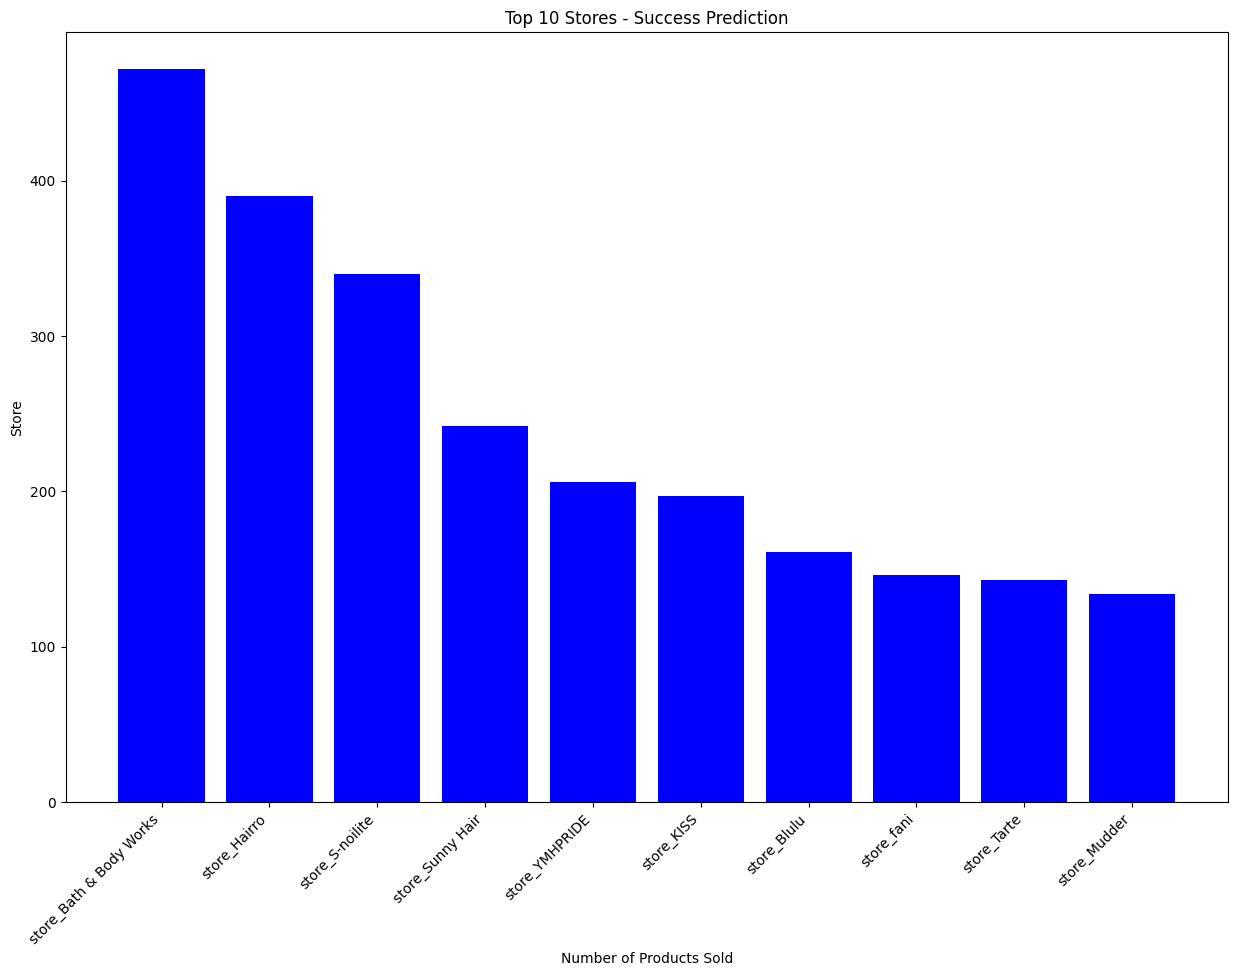

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting bar plots of counts of products sold by main 10 stores

top10 = merged_encoded_store_df.sort_values('count', ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(top10['store'], top10['count'], color = 'blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Number of Products Sold")
plt.ylabel("Store")
plt.title("Top 10 Stores - Success Prediction")
plt.show()
os.chdir(OUTPUT_DIR/'Figures')
plt.savefig('top10_stores.png')

In [ ]:
'''
I originally thought feature engineering would follow this path:
Create features → Select features → Train model

In reality, the process was:
Create 73 features → EDA → Transform 26 features → Check correlations → Remove
19 multicollinear → Check target correlation → Remove 19 weak → Re-engineer
categoricals → Final 36 features

Key realizations:
- Cannot know which features are "good" without exploring data first
- Transformations (log, winsorization) created "new" features that need re-evaluation
- Feature selection is not a single step but an iterative refinement
- Each removal decision requires re-checking relationships (removing one feature
  changes importance of others)

Practical Impact: Adopted iterative workflow with validation checks after each transformation/removal step, preventing premature decisions.'''

In [ ]:
'''
Oversampling Comsideration :

Even though SMOTE would have created synthetic successful products it woudln't reflect real market patterns hence will be using XGBoost models that works well with imbalanced data
by using scale_pos-weights features instead of AMOTE.


Embedding Method Consideration:

PCA and autoencoder-based embeddings were considered but NOT implemented.

Reasoning:
- Interpretability critical for business stakeholders
- Need actionable insights ("increase week 1 reviews") instead of abstract components ("increase component 1 by 0.7")
- Store frequency encoding provides sufficient signal with clarity
- Limited positive samples (6,823) make embedding learning challenging



Interpretable features  and real market similarities are prioritized over potential marginal gains from embedding and oversampling methods.

'''



In [ ]:
'''FINAL EDA OUTCOMES :

DATASET TRANSFORMATION SUMMARY:
- Starting features: 73 (after initial engineering)
- After multicollinearity removal: 54 features (-19)
- After weak feature removal: 36 features (-19)
- Final dataset: 113,368 samples x 36 features

FEATURE COMPOSITION (36 features):
- Temporal/Velocity: 7 features
- Rating: 6 features
- Sentiment: 4 features
- Review/Text: 3 features
- Verification: 2 features
- Categorical: 2 features (store_frequency, category_All_Beauty)
- Transformed: 12 log-transformed features included

KEY EDA INSIGHTS FOR MODELING:

1. CLASS IMBALANCE: 16:1 ratio since this represent actual real world data will not be using SMOTE to oversample mionority successful class to help model identify proper success prroducts

2. TEMPORAL FEATURES DOMINANT:
   - reviews_per_week strongest predictor (Spearman: 0.68)
   - Week 1 momentum critical (early_momentum_pct: 0.55)
   - Temporal features account for 5 of top 7 correlations

3. RATING DISTRIBUTION was AVERAGE:
   - pct_5_star more predictive than avg_rating
   - Rating consensus (low std_rating) indicates quality for better success prediction

4. EXTREME SKEWNESS ADDRESSED:
   - Log transformations applied to 26 features
   - Reduced skew from 20+ to <2 for most features

5. MULTICOLLINEARITY : Applied Multicolliearnity steps through Chi square and Speare corr to indentify weak features and got them removed/

6. DIMENSIONALITY REDUCED:
   - 51% feature reduction (73 to 36) with minimal information loss
   - Training efficiency improved, overfitting risk reduced

  '''